In [3]:
import numpy as np
import h5py
import pandas as pd

In [72]:
#Reading matlab files and converting into numpy array
data = {}
targets = {}
files = open('files', 'r')
lines = files.readlines()
count = {}
for line in lines:
    fileName, target = line.strip().split(";")
    with h5py.File(fileName, 'r') as f:
        for k, v in f.items():
            tmp=np.array(v).transpose()
            if not target in data.keys():
                data[target]=tmp
                count[target] = tmp.shape[0]
            else:
                data[target] = np.concatenate((data[target], tmp))
                count[target]+= tmp.shape[0]
totalCount = 0
i=0
targetsColumn = None
for k, v in count.items():
    targets[k]=np.ones(v, dtype=int)*int(i)
    totalCount += v
    if i==0:
        targetsColumn = targets[k]
    else:
        targetsColumn = np.concatenate((targetsColumn, targets[k]))
    i += 1
targetsColumn=targetsColumn.reshape(targetsColumn.shape[0], 1)
dataSet = None
for k, v in data.items():
    if dataSet is None:
        dataSet = data[k]
    else:
        dataSet = np.concatenate((dataSet, data[k]))
dataSet = np.concatenate((dataSet, targetsColumn), axis=1)

[[10856  9761  8767 ... 11280  7453     0]
 [10883  9767  8845 ... 10465  7143     0]
 [10893  9787  8797 ... 10563  7026     0]
 ...
 [10026  9285  9514 ... 14579  8932     2]
 [10004  9281  9451 ... 16861  9970     2]
 [ 9875  8973  8637 ... 12962  8935     2]]
[[10856  9761  8767 ... 17400 11280  7453]
 [10883  9767  8845 ... 17759 10465  7143]
 [10893  9787  8797 ... 17908 10563  7026]
 ...
 [13641 12630 11277 ... 18879 11882  8490]
 [12006 10930  9883 ... 22377 12739  7981]
 [13098 11976 10765 ... 17510 11067  8063]]
[[10793 10004  9701 ... 16629 12424  9200]
 [10335  9521  8967 ... 18219 12143  8506]
 [10217  9280  8983 ... 20643 13086  8604]
 ...
 [10026  9285  9514 ... 21104 14579  8932]
 [10004  9281  9451 ... 23822 16861  9970]
 [ 9875  8973  8637 ... 15796 12962  8935]]


In [73]:
df = pd.DataFrame(data=dataSet, columns=["Costal", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2", "Target"])
df

Costal  Blue  Green   Red    NIR  SWIR1  SWIR2  Target
0       10856  9761   8767  7646  17400  11280   7453       0
1       10883  9767   8845  7616  17759  10465   7143       0
2       10893  9787   8797  7574  17908  10563   7026       0
3       10844  9813   8808  7617  17533  10779   7173       0
4       10945  9848   9001  7699  21179  12428   7952       0
...       ...   ...    ...   ...    ...    ...    ...     ...
45402   10053  9231   8983  8140  21430  13972   9350       2
45403    9465  8638   8662  8334  21553  12664   7129       2
45404   10026  9285   9514  8931  21104  14579   8932       2
45405   10004  9281   9451  8706  23822  16861   9970       2
45406    9875  8973   8637  7995  15796  12962   8935       2

[45407 rows x 8 columns]

In [80]:
from sklearn.preprocessing import StandardScaler
features = ["Costal", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]
x=df.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [90]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df[['Target']]], axis = 1)
finalDf['Target'] = finalDf['Target'].replace({0:"coca", 1:"nubes", 2:"cana"})
finalDf

PC1       PC2 Target
0     -1.723103 -0.500361   coca
1     -1.796515 -0.755646   coca
2     -1.798228 -0.745657   coca
3     -1.781040 -0.666753   coca
4     -1.430357 -0.203229   coca
...         ...       ...    ...
45402 -1.198201  0.378180   cana
45403 -1.560821 -0.210935   cana
45404 -1.170990  0.474449   cana
45405 -0.806731  1.156054   cana
45406 -1.557989  0.159972   cana

[45407 rows x 3 columns]

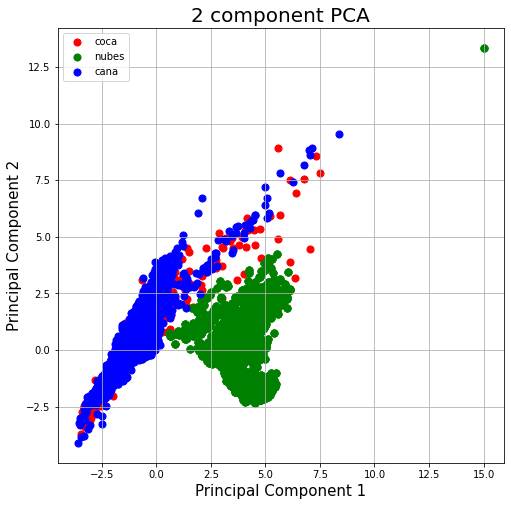

In [91]:
from matplotlib import pyplot as plt


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['coca', 'nubes', 'cana']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()